In [1]:
import pandas as pd
import numpy as np

In [5]:
import seaborn as sns

In [2]:
file_url = 'https://raw.githubusercontent.com/aso-uts/applied_ds/master/unit3/dataset/Car%20Evaluation.csv'
df = pd.read_csv(file_url)

In [3]:
df.head()

,buying_price,maintenance_cost,doors,persons_capacity,luggage_boot,safety,evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying_price        1728 non-null object
maintenance_cost    1728 non-null object
doors               1728 non-null object
persons_capacity    1728 non-null object
luggage_boot        1728 non-null object
safety              1728 non-null object
evaluation          1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


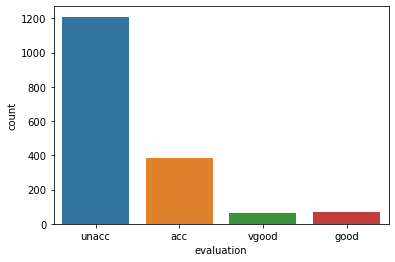

In [23]:
sns.countplot(x = 'evaluation', data=df)

In [6]:
df_cleaned = df.copy()

In [7]:
cat_cols = [i for i in df.columns]
cat_cols

['buying_price',
 'maintenance_cost',
 'doors',
 'persons_capacity',
 'luggage_boot',
 'safety',
 'evaluation']

In [8]:
def show_cat_col_info(df,cat_cols):
    for i in cat_cols:
        print(f'Column - {i}: {len(df[i].unique())} unique values')
        print(df[i].unique())
        print()

In [15]:
show_cat_col_info(df_cleaned,cat_cols)

Column - buying_price: 4 unique values
['vhigh' 'high' 'med' 'low']

Column - maintenance_cost: 4 unique values
['vhigh' 'high' 'med' 'low']

Column - doors: 4 unique values
['2' '3' '4' '5more']

Column - persons_capacity: 3 unique values
['2' '4' 'more']

Column - luggage_boot: 3 unique values
['small' 'med' 'big']

Column - safety: 3 unique values
['low' 'med' 'high']

Column - evaluation: 4 unique values
['unacc' 'acc' 'vgood' 'good']



In [13]:
def create_cats_dict(df,cat_cols):
    
    cats_dict = dict()
    for i in cat_cols:
        cats_dict[i] = [list(df[i].unique())]
    return cats_dict

In [16]:
cats_dict = create_cats_dict(df_cleaned,cat_cols)
cats_dict

{'buying_price': [['vhigh', 'high', 'med', 'low']],
 'maintenance_cost': [['vhigh', 'high', 'med', 'low']],
 'doors': [['2', '3', '4', '5more']],
 'persons_capacity': [['2', '4', 'more']],
 'luggage_boot': [['small', 'med', 'big']],
 'safety': [['low', 'med', 'high']],
 'evaluation': [['unacc', 'acc', 'vgood', 'good']]}

In [27]:
cats_dict['evaluation'][0].index('unacc')

0

In [37]:
evals = df.evaluation.astype('category')
evals_dict = dict(enumerate(evals.cat.categories))
evals_dict = dict((v,k) for k,v in evals_dict.items())

In [38]:
evals_dict

{'acc': 0, 'good': 1, 'unacc': 2, 'vgood': 3}

In [39]:
evals_dict['acc']

0

In [17]:
df_cleaned

,buying_price,maintenance_cost,doors,persons_capacity,luggage_boot,safety,evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [18]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

In [19]:
def encode_cat_cols(df, cats_dict):
    for col, cats in cats_dict.items():
        col_encoder = OrdinalEncoder(categories=cats)
        df[col] = col_encoder.fit_transform(df[[col]])
    return df

In [20]:
df_cleaned = encode_cat_cols(df_cleaned, cats_dict)

In [21]:
df_cleaned

,buying_price,maintenance_cost,doors,persons_capacity,luggage_boot,safety,evaluation
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...
1723,3.0,3.0,3.0,2.0,1.0,1.0,3.0
1724,3.0,3.0,3.0,2.0,1.0,2.0,2.0
1725,3.0,3.0,3.0,2.0,2.0,0.0,0.0
1726,3.0,3.0,3.0,2.0,2.0,1.0,3.0


In [22]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying_price        1728 non-null float64
maintenance_cost    1728 non-null float64
doors               1728 non-null float64
persons_capacity    1728 non-null float64
luggage_boot        1728 non-null float64
safety              1728 non-null float64
evaluation          1728 non-null float64
dtypes: float64(7)
memory usage: 94.6 KB


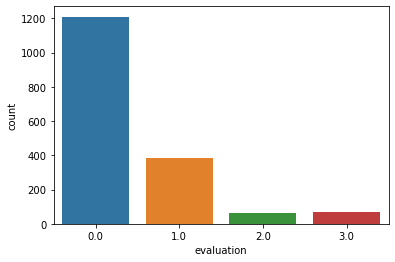

In [24]:
sns.countplot(x = 'evaluation', data=df_cleaned)

In [40]:
num_cols = ['buying_price', 'maintenance_cost', 'doors', 'persons_capacity', 'luggage_boot', 'safety']

In [41]:
sc = StandardScaler()
df_cleaned[num_cols] = sc.fit_transform(df_cleaned[num_cols])

In [42]:
df_cleaned

,buying_price,maintenance_cost,doors,persons_capacity,luggage_boot,safety,evaluation
0,-1.341641,-1.341641,-1.341641,-1.224745,-1.224745,-1.224745,0.0
1,-1.341641,-1.341641,-1.341641,-1.224745,-1.224745,0.000000,0.0
2,-1.341641,-1.341641,-1.341641,-1.224745,-1.224745,1.224745,0.0
3,-1.341641,-1.341641,-1.341641,-1.224745,0.000000,-1.224745,0.0
4,-1.341641,-1.341641,-1.341641,-1.224745,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...
1723,1.341641,1.341641,1.341641,1.224745,0.000000,0.000000,3.0
1724,1.341641,1.341641,1.341641,1.224745,0.000000,1.224745,2.0
1725,1.341641,1.341641,1.341641,1.224745,1.224745,-1.224745,0.0
1726,1.341641,1.341641,1.341641,1.224745,1.224745,0.000000,3.0
